**Resources**
https://www.kaggle.com/datasets/azminetoushikwasi/ott-video-streaming-platforms-revenue-and-users
https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney
https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney
https://www.kaggle.com/code/deepaktron/amazon-prime-user-data-analysis
https://www.kaggle.com/datasets/mauryansshivam/walt-disney-ott-platforms-revenue-and-subscribers/data


**Streaming Wars**




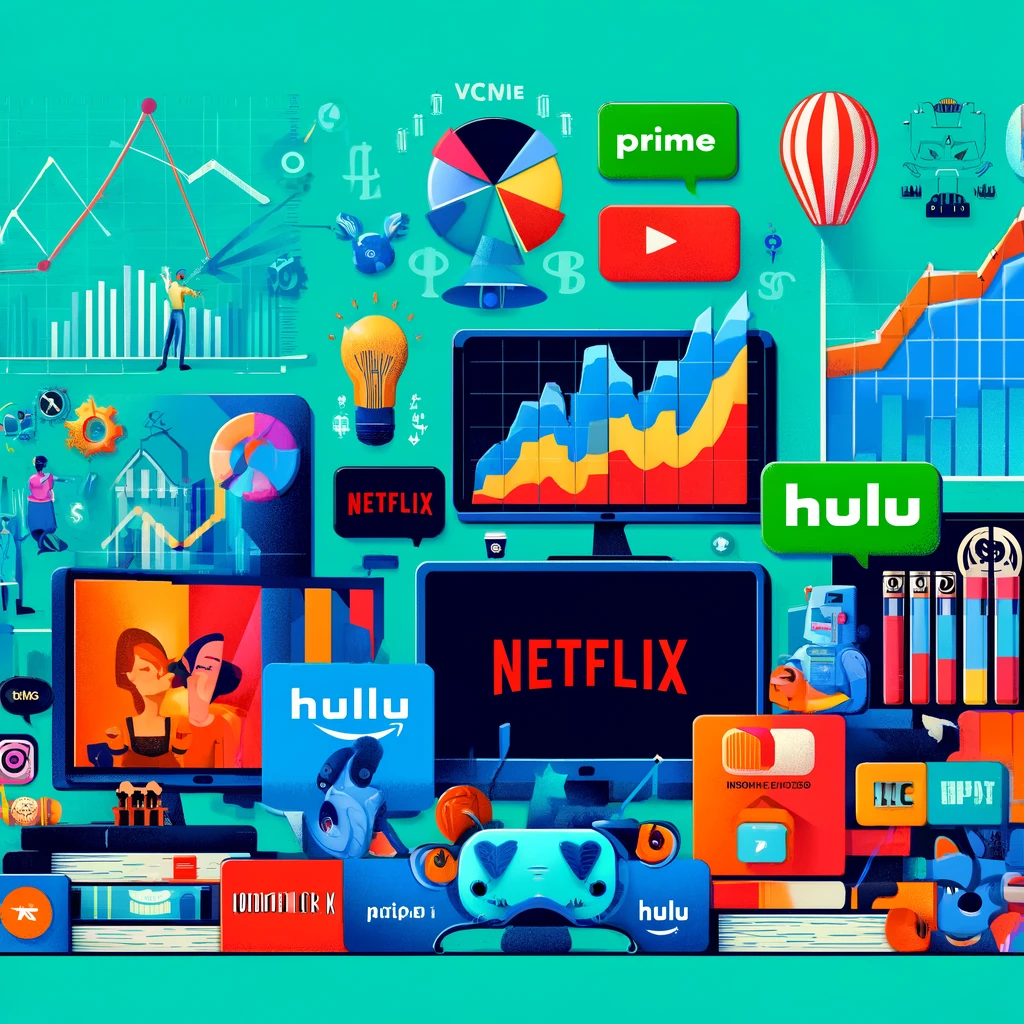

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import json
import requests
from IPython.display import JSON

First thing were going to do is read and aggregate the files

In [143]:
#List of all file names
files = [
    'AdRevenue.csv','AppUsage.csv','CableTVSubscribersData.csv','ContentSpend.csv','LiveTVSubscribers.csv','NumSubscribers.csv','NumSubscribersByRegion.csv','Profit.csv','Revenue.csv','RevenueByRegion.csv','SubscriptionRevenue.csv','Valuation.csv','tv_shows 2.csv','tv_shows.csv', 'disney.csv','amazon_prime_users.csv'
]

In [144]:
#list to store DataFrames
List_of_files = []

In [145]:
# Read each file in the data
for file in files:
  Industry = pd.read_csv(file)
  List_of_files.append(Industry)


FileNotFoundError: [Errno 2] No such file or directory: 'AdRevenue.csv'

In [ ]:
# Display the first few rows of each DataFrame
for i, Industry in enumerate(List_of_files):
  print(f"\nList_of_files {i+1}:")
  print(Industry.head())

Aggregate the DataFrames

In [ ]:
#Combine all the files
Combined_df = pd.concat(List_of_files,ignore_index=True)

In [ ]:
#Save the combined Dataframe to a new CSV file
Combined_df.to_csv('combined_data.csv', index=False)

In [291]:
Entertain = pd.read_csv('combined_data.csv')

<ipython-input-291-c6d97c3cc2fb>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,35,38,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  Entertain = pd.read_csv('combined_data.csv')


In [292]:
# Fill NA values with the mean of each column
Entertain1 = Entertain.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col.fillna('Unknown'), axis=0)

In [293]:
Entertain1

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,...,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Hulu Subscription Revenue,Disney Subscription Revenue,Netflix Revenue
0,1.0,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,...,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,1.0,0,0,0
1,2.0,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,...,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,1.0,0,0,0
2,3.0,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,...,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,1.0,0,0,0
3,4.0,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,...,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,1.0,0,0,0
4,5.0,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,...,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,1250.5,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,10/100,0.000000,17.000000,1.0,1.000000,1.0,1300000000,0,11600000000
17595,1250.5,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,10/100,0.000000,25.000000,1.0,1.000000,1.0,1600000000,0,15700000000
17596,1250.5,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,10/100,0.000000,39.000000,1.0,1.000000,1.0,2900000000,0,24900000000
17597,1250.5,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,10/100,0.000000,25.000000,1.0,1.000000,1.0,1600000000,0,15700000000


First were going to drop all of the data that we dont need

In [294]:
#list of columns to drop
drop = ['Name', 'User Id', 'Email Address', 'Username', 'Gender', 'Location', 'ID', 'Age', 'Date of Birth', 'Renewal Status', 'Usage Frequency', 'Purchase History', 'Favorite Genres', 'Devices Used', 'Valuation', 'Unnamed', 'Type', 'Feedback/Ratings', 'Customer Support Interactions', 'Engagement Metrics', 'Disney+Hotstar Subscribers', 'HULU LIVE TV+SVOD Subscribers', 'ESPN+ Subscribers', 'HULU SVOD Subscribers', 'Unnamed: 0', 'HULU LIVE TV+ SVOD ARPU', 'User ID', 'ESPN+ ARPU', 'DTC Subscription Revenue', 'Payment Information', 'TV/SVOD distribution and other Revnue', 'Total DTC Revenue', 'Advertising Revenue', 'Ad Revenue', 'App Name', 'App Usage', 'age', 'gender', 'income', 'kids', 'ownHome', 'subscribe', 'Segment','Content spend', 'US & Canada', 'EMEA', 'Latin America', 'Asia-Pacific', 'IMDb', 'Live TV Subscribers', 'Spp Subscribers', 'Profit', 'Revenue', 'Subscription Revenue', 'HULU SVOD ARPU', 'Disney+ Subscribers', 'HULU TOTAL Subscribers', 'DISNEY+  ARPU', 'HULU SVOD ARPU', 'Disney Subscription Revenue' 'Revenue_x', 'Subscription Revenue_x', 'Revenue_x']
#drop columns'
clean_data = Entertain1.drop(columns=drop, errors='ignore')

In [295]:
clean_data

,Membership Start Date,Membership End Date,Subscription Plan,Year,Title,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Hulu Subscription Revenue,Disney Subscription Revenue,Netflix Revenue
0,2024-01-15,2025-01-14,Annual,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0
1,2024-01-07,2025-01-06,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0
2,2024-04-13,2025-04-13,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0
3,2024-01-24,2025-01-23,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0
4,2024-02-14,2025-02-13,Annual,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,Unknown,Unknown,Unknown,2017,Paradise Islands,10/100,0.000000,17.000000,1.0,1.000000,1300000000,0,11600000000
17595,Unknown,Unknown,Unknown,2018,Mexico Untamed,10/100,0.000000,25.000000,1.0,1.000000,1600000000,0,15700000000
17596,Unknown,Unknown,Unknown,2020,Wild Centeral America,10/100,0.000000,39.000000,1.0,1.000000,2900000000,0,24900000000
17597,Unknown,Unknown,Unknown,2018,Wild Russia,10/100,0.000000,25.000000,1.0,1.000000,1600000000,0,15700000000


Now we have to figure out how much money amazon prime video is making and make a section for that and clean that a bit

In [296]:
#Define updated costs for subscriptions
annual_cost = 139 # Prime video annual cost
monthly_cost = 14.99 # Prime video monthly cost

In [297]:
#Count the number of subscribers for each plan
annual_subscribers = clean_data[clean_data['Subscription Plan'] == 'Annual'].shape[0]
monthly_subscribers = clean_data[clean_data['Subscription Plan'] == 'Monthly'].shape[0]

In [298]:
#calculate revenue
annual_revenue = annual_subscribers * annual_cost
monthly_revenue = monthly_subscribers * monthly_cost * 12 #monthly cost multiplied by 12 months

In [299]:
#Total Revenue
total_revenue = annual_revenue + monthly_revenue

In [300]:
total_revenue

397741.52

Lets make a new column that reflects the money made by amazon in subscriptions

In [301]:
#create new column
clean_data['Prime Video Subscription ARPU'] = total_revenue

In [302]:
 #drop unneeded items
columns_to_drop = ['']
cleaner_data = clean_data.drop(columns=columns_to_drop, errors='ignore')

In [303]:
cleaner_data

,Membership Start Date,Membership End Date,Subscription Plan,Year,Title,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Hulu Subscription Revenue,Disney Subscription Revenue,Netflix Revenue,Prime Video Subscription ARPU
0,2024-01-15,2025-01-14,Annual,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
1,2024-01-07,2025-01-06,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
2,2024-04-13,2025-04-13,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
3,2024-01-24,2025-01-23,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
4,2024-02-14,2025-02-13,Annual,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,Unknown,Unknown,Unknown,2017,Paradise Islands,10/100,0.000000,17.000000,1.0,1.000000,1300000000,0,11600000000,397741.52
17595,Unknown,Unknown,Unknown,2018,Mexico Untamed,10/100,0.000000,25.000000,1.0,1.000000,1600000000,0,15700000000,397741.52
17596,Unknown,Unknown,Unknown,2020,Wild Centeral America,10/100,0.000000,39.000000,1.0,1.000000,2900000000,0,24900000000,397741.52
17597,Unknown,Unknown,Unknown,2018,Wild Russia,10/100,0.000000,25.000000,1.0,1.000000,1600000000,0,15700000000,397741.52


Theres alot of null data for year next lets do something about that

In [304]:
#forward fill
cleaner_data['Year'] = cleaner_data['Year'].fillna(method='ffill')

In [305]:
#backward fill
cleaner_data['Year'] = cleaner_data['Year'].fillna(method='bfill')


forward fill carries last value data forward
backward fill carries last value backward
Forward Fill: when the past value is more relevant to the missing period.
Backward Fill: when the future value should reflect the missing period.

In [306]:
# Verify the null values are handled
cleaner_data['Year'].isnull().sum(), cleaner_data.head()

(0,
   Membership Start Date Membership End Date Subscription Plan     Year  \
 0            2024-01-15          2025-01-14            Annual  Unknown   
 1            2024-01-07          2025-01-06           Monthly  Unknown   
 2            2024-04-13          2025-04-13           Monthly  Unknown   
 3            2024-01-24          2025-01-23           Monthly  Unknown   
 4            2024-02-14          2025-02-13            Annual  Unknown   
 
      Title Rotten Tomatoes   Netflix       Hulu  Prime Video   Disney+  \
 0  Unknown         Unknown  0.422616  18.193914          1.0  0.057607   
 1  Unknown         Unknown  0.422616  18.193914          1.0  0.057607   
 2  Unknown         Unknown  0.422616  18.193914          1.0  0.057607   
 3  Unknown         Unknown  0.422616  18.193914          1.0  0.057607   
 4  Unknown         Unknown  0.422616  18.193914          1.0  0.057607   
 
    Hulu Subscription Revenue  Disney Subscription Revenue  Netflix Revenue  \
 0           

In [307]:
cleaner_data

,Membership Start Date,Membership End Date,Subscription Plan,Year,Title,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Hulu Subscription Revenue,Disney Subscription Revenue,Netflix Revenue,Prime Video Subscription ARPU
0,2024-01-15,2025-01-14,Annual,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
1,2024-01-07,2025-01-06,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
2,2024-04-13,2025-04-13,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
3,2024-01-24,2025-01-23,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
4,2024-02-14,2025-02-13,Annual,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,Unknown,Unknown,Unknown,2017,Paradise Islands,10/100,0.000000,17.000000,1.0,1.000000,1300000000,0,11600000000,397741.52
17595,Unknown,Unknown,Unknown,2018,Mexico Untamed,10/100,0.000000,25.000000,1.0,1.000000,1600000000,0,15700000000,397741.52
17596,Unknown,Unknown,Unknown,2020,Wild Centeral America,10/100,0.000000,39.000000,1.0,1.000000,2900000000,0,24900000000,397741.52
17597,Unknown,Unknown,Unknown,2018,Wild Russia,10/100,0.000000,25.000000,1.0,1.000000,1600000000,0,15700000000,397741.52


Now lets fill all the null data with 0


In [308]:
# Fill null values with 0 for the specified columns
columns_to_fill = [
    'Hulu', 'Prime Video', 'Disney+', 'Netflix'
]

In [309]:
# Fill null values with 0
cleaner_data[columns_to_fill] = cleaner_data[columns_to_fill].fillna(0)


In [310]:
cleaner_data


,Membership Start Date,Membership End Date,Subscription Plan,Year,Title,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Hulu Subscription Revenue,Disney Subscription Revenue,Netflix Revenue,Prime Video Subscription ARPU
0,2024-01-15,2025-01-14,Annual,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
1,2024-01-07,2025-01-06,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
2,2024-04-13,2025-04-13,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
3,2024-01-24,2025-01-23,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
4,2024-02-14,2025-02-13,Annual,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,Unknown,Unknown,Unknown,2017,Paradise Islands,10/100,0.000000,17.000000,1.0,1.000000,1300000000,0,11600000000,397741.52
17595,Unknown,Unknown,Unknown,2018,Mexico Untamed,10/100,0.000000,25.000000,1.0,1.000000,1600000000,0,15700000000,397741.52
17596,Unknown,Unknown,Unknown,2020,Wild Centeral America,10/100,0.000000,39.000000,1.0,1.000000,2900000000,0,24900000000,397741.52
17597,Unknown,Unknown,Unknown,2018,Wild Russia,10/100,0.000000,25.000000,1.0,1.000000,1600000000,0,15700000000,397741.52


Next lets filter and Categorize The titles by service

In [311]:
# Filter and categorize titles by streaming service
filtered_titles = cleaner_data.dropna(subset=['Title']).copy()



In [312]:
# Categorize titles by streaming service
cleaner_data['Service'] = cleaner_data.apply(
    lambda row: 'Hulu' if row['Hulu'] == 1 else
                'Disney+' if row['Disney+'] == 1 else
                'Prime Video' if row['Prime Video'] == 1 else
                'Netflix' if row['Netflix'] == 1 else
                'Other', axis=1)



In [313]:
# Sort the data by service
sorted_titles = cleaner_data[['Title', 'Service']].sort_values(by='Service')


In [314]:
sorted_titles

,Title,Service
17598,Fearless Adventures with Jack Randall,Disney+
12137,Teacher's Pet,Disney+
12136,Kingdom of the Polar Bears,Disney+
12135,Disney's Fairy Tale Weddings,Disney+
12134,Dino Ranch,Disney+
...,...,...
5860,Jurassic World: Camp Cretaceous,Prime Video
5859,Jurassic World: Camp Cretaceous,Prime Video
5858,Jurassic World: Camp Cretaceous,Prime Video
5864,The Serpent,Prime Video


In [315]:
cleaner_data

,Membership Start Date,Membership End Date,Subscription Plan,Year,Title,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Hulu Subscription Revenue,Disney Subscription Revenue,Netflix Revenue,Prime Video Subscription ARPU,Service
0,2024-01-15,2025-01-14,Annual,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52,Prime Video
1,2024-01-07,2025-01-06,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52,Prime Video
2,2024-04-13,2025-04-13,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52,Prime Video
3,2024-01-24,2025-01-23,Monthly,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52,Prime Video
4,2024-02-14,2025-02-13,Annual,Unknown,Unknown,Unknown,0.422616,18.193914,1.0,0.057607,0,0,0,397741.52,Prime Video
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,Unknown,Unknown,Unknown,2017,Paradise Islands,10/100,0.000000,17.000000,1.0,1.000000,1300000000,0,11600000000,397741.52,Disney+
17595,Unknown,Unknown,Unknown,2018,Mexico Untamed,10/100,0.000000,25.000000,1.0,1.000000,1600000000,0,15700000000,397741.52,Disney+
17596,Unknown,Unknown,Unknown,2020,Wild Centeral America,10/100,0.000000,39.000000,1.0,1.000000,2900000000,0,24900000000,397741.52,Disney+
17597,Unknown,Unknown,Unknown,2018,Wild Russia,10/100,0.000000,25.000000,1.0,1.000000,1600000000,0,15700000000,397741.52,Disney+


Now were going to add a movie column for each type of movie, disney movies etc that way we can visualize the data

In [316]:
# Add new columns for movies in Hulu, Disney+, and Prime Video
cleaner_data['Hulu Movies'] = cleaner_data.apply(lambda row: row['Title'] if row['Service'] == 'Hulu' else None, axis=1)
cleaner_data['Disney+ Movies'] = cleaner_data.apply(lambda row: row['Title'] if row['Service'] == 'Disney+' else None, axis=1)
cleaner_data['Prime Video Movies'] = cleaner_data.apply(lambda row: row['Title'] if row['Service'] == 'Prime Video' else None, axis=1)
cleaner_data['Netflix'] = cleaner_data.apply(lambda row: row['Title'] if row['Service'] == 'Netflix' else None, axis=1)

In [317]:
cleaner_data

,Membership Start Date,Membership End Date,Subscription Plan,Year,Title,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Hulu Subscription Revenue,Disney Subscription Revenue,Netflix Revenue,Prime Video Subscription ARPU,Service,Hulu Movies,Disney+ Movies,Prime Video Movies
0,2024-01-15,2025-01-14,Annual,Unknown,Unknown,Unknown,None,18.193914,1.0,0.057607,0,0,0,397741.52,Prime Video,None,None,Unknown
1,2024-01-07,2025-01-06,Monthly,Unknown,Unknown,Unknown,None,18.193914,1.0,0.057607,0,0,0,397741.52,Prime Video,None,None,Unknown
2,2024-04-13,2025-04-13,Monthly,Unknown,Unknown,Unknown,None,18.193914,1.0,0.057607,0,0,0,397741.52,Prime Video,None,None,Unknown
3,2024-01-24,2025-01-23,Monthly,Unknown,Unknown,Unknown,None,18.193914,1.0,0.057607,0,0,0,397741.52,Prime Video,None,None,Unknown
4,2024-02-14,2025-02-13,Annual,Unknown,Unknown,Unknown,None,18.193914,1.0,0.057607,0,0,0,397741.52,Prime Video,None,None,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,Unknown,Unknown,Unknown,2017,Paradise Islands,10/100,None,17.000000,1.0,1.000000,1300000000,0,11600000000,397741.52,Disney+,None,Paradise Islands,None
17595,Unknown,Unknown,Unknown,2018,Mexico Untamed,10/100,None,25.000000,1.0,1.000000,1600000000,0,15700000000,397741.52,Disney+,None,Mexico Untamed,None
17596,Unknown,Unknown,Unknown,2020,Wild Centeral America,10/100,None,39.000000,1.0,1.000000,2900000000,0,24900000000,397741.52,Disney+,None,Wild Centeral America,None
17597,Unknown,Unknown,Unknown,2018,Wild Russia,10/100,None,25.000000,1.0,1.000000,1600000000,0,15700000000,397741.52,Disney+,None,Wild Russia,None


Lets show what movies and tv shows from each subscription service has come out over the years

In [174]:
# Filter the data to show only Hulu related columns
hulu_data = cleaner_data[['Year', 'Hulu', 'Hulu Subscription Revenue', 'Hulu Movies']]

In [175]:
# Count the number of Na entries in the 'Hulu Movies' column
hulu_movies_count = hulu_data['Hulu Movies'].notna().sum()
hulu_movies_count

297

In [176]:
# Check if the 'Hulu Movies' column has corresponding years in the data
hulu_movies_with_years = hulu_data[['Year', 'Hulu Movies']].dropna()

hulu_movies_with_years

,Year,Hulu Movies
9797,2011,Yu-Gi-Oh! Zexal
9833,2011,Long Island Medium
9843,2011,I Love Jenni
9852,2011,Cardfight!! Vanguard
9864,2011,The Chew
...,...,...
17361,2011,Kickin' It
17362,2011,Brain Games
17408,2011,A.N.T. Farm
17420,2011,Jake and the Never Land Pirates


**Description of Dataset**
This dataset contains information on revenue, user statistics, and content availability for major OTT platforms: Netflix, Prime Video, Hulu, and Disney+. It includes approximately 14,000 entries, classified by platform and content type. We will analyze revenue trends, user engagement, and content distribution.



**Descriptive Question:**
"How has the content library grown for each OTT platform (Netflix, Prime Video, Hulu, and Disney+) from 2009 to 2022, and which platform shows the most significant increase in content availability during this period?"

In [177]:
# Ensure the 'Year' column is of type integer
cleaner_data['Year'] = pd.to_numeric(cleaner_data['Year'], errors='coerce')


In [178]:
#Data is a string type the values 2009 and 2022 are integers
# Convert the 'Year' column to integer type
disney_data['Year'] = disney_data['Year'].astype(int)
netflix_data['Year'] = netflix_data['Year'].astype(int)

<ipython-input-178-a32f683f2200>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_data['Year'] = disney_data['Year'].astype(int)


In [180]:
#lets set up our data for visualizations
# Filter data for the years 2009 to 2022
disney_data_filtered = disney_data[(disney_data['Year'] >= 2009) & (disney_data['Year'] <= 2022)]
prime_video_data_filtered = prime_video_data[(prime_video_data['Year'] >= 2009) & (prime_video_data['Year'] <= 2022)]
netflix_data_filtered = netflix_data[(netflix_data['Year'] >= 2009) & (netflix_data['Year'] <= 2022)]
hulu_data_filtered = hulu_data[(hulu_data['Year'] >= 2009) & (hulu_data['Year'] <= 2022)]


TypeError: '>=' not supported between instances of 'str' and 'int'

In [181]:
# Count the number of movies over the years for each service
disney_movies_over_years = disney_data_filtered.groupby('Year').count()['Disney+ Movies'].reset_index()
prime_video_movies_over_years = prime_video_data_filtered.groupby('Year').count()['Prime Video Movies'].reset_index()
netflix_movies_over_years = netflix_data_filtered.groupby('Year').count()['Netflix'].reset_index()
hulu_movies_over_years = hulu_data_filtered.groupby('Year').count()['Hulu Movies'].reset_index()

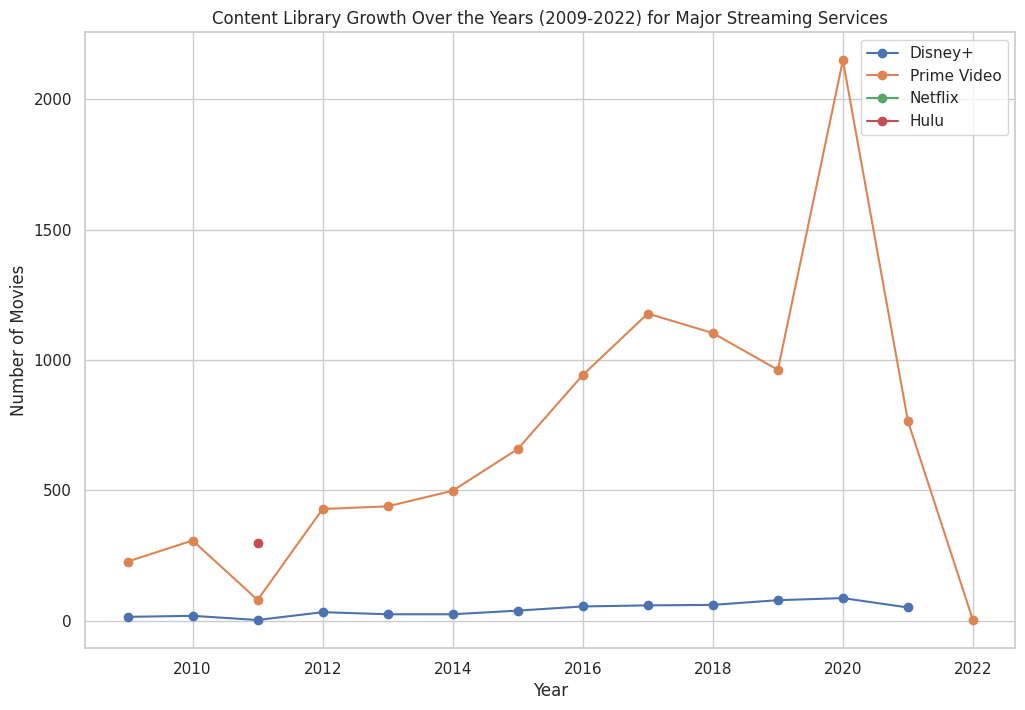

In [182]:
# Plot the content library growth over time from 2009 to 2022
plt.figure(figsize=(12, 8))
plt.plot(disney_movies_over_years['Year'], disney_movies_over_years['Disney+ Movies'], marker='o', linestyle='-', label='Disney+')
plt.plot(prime_video_movies_over_years['Year'], prime_video_movies_over_years['Prime Video Movies'], marker='o', linestyle='-', label='Prime Video')
plt.plot(netflix_movies_over_years['Year'], netflix_movies_over_years['Netflix'], marker='o', linestyle='-', label='Netflix')
plt.plot(hulu_movies_over_years['Year'], hulu_movies_over_years['Hulu Movies'], marker='o', linestyle='-', label='Hulu')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Content Library Growth Over the Years (2009-2022) for Major Streaming Services')
plt.legend()
plt.grid(True)
plt.show()


**Conclusion:**
The graph highlights distinct content strategies among the streaming platforms. Disney+ has shown consistent growth, accelerating in recent years. Prime Video experienced significant fluctuations, with a peak in 2019 followed by a decline. We lack the data for netflix and hulu to do a good analysis.

**Descriptive Question**:
"How has the subscription revenue for major streaming services (Netflix, Hulu, and Disney+) evolved from 2009 to 2022, and what trends can be observed in their growth trajectories over the years?"

In [183]:
# Filter the data to only include the years 2009 to 2022
filtered_data = revenue_data[(revenue_data['Year'] >= 2009) & (revenue_data['Year'] <= 2022)]


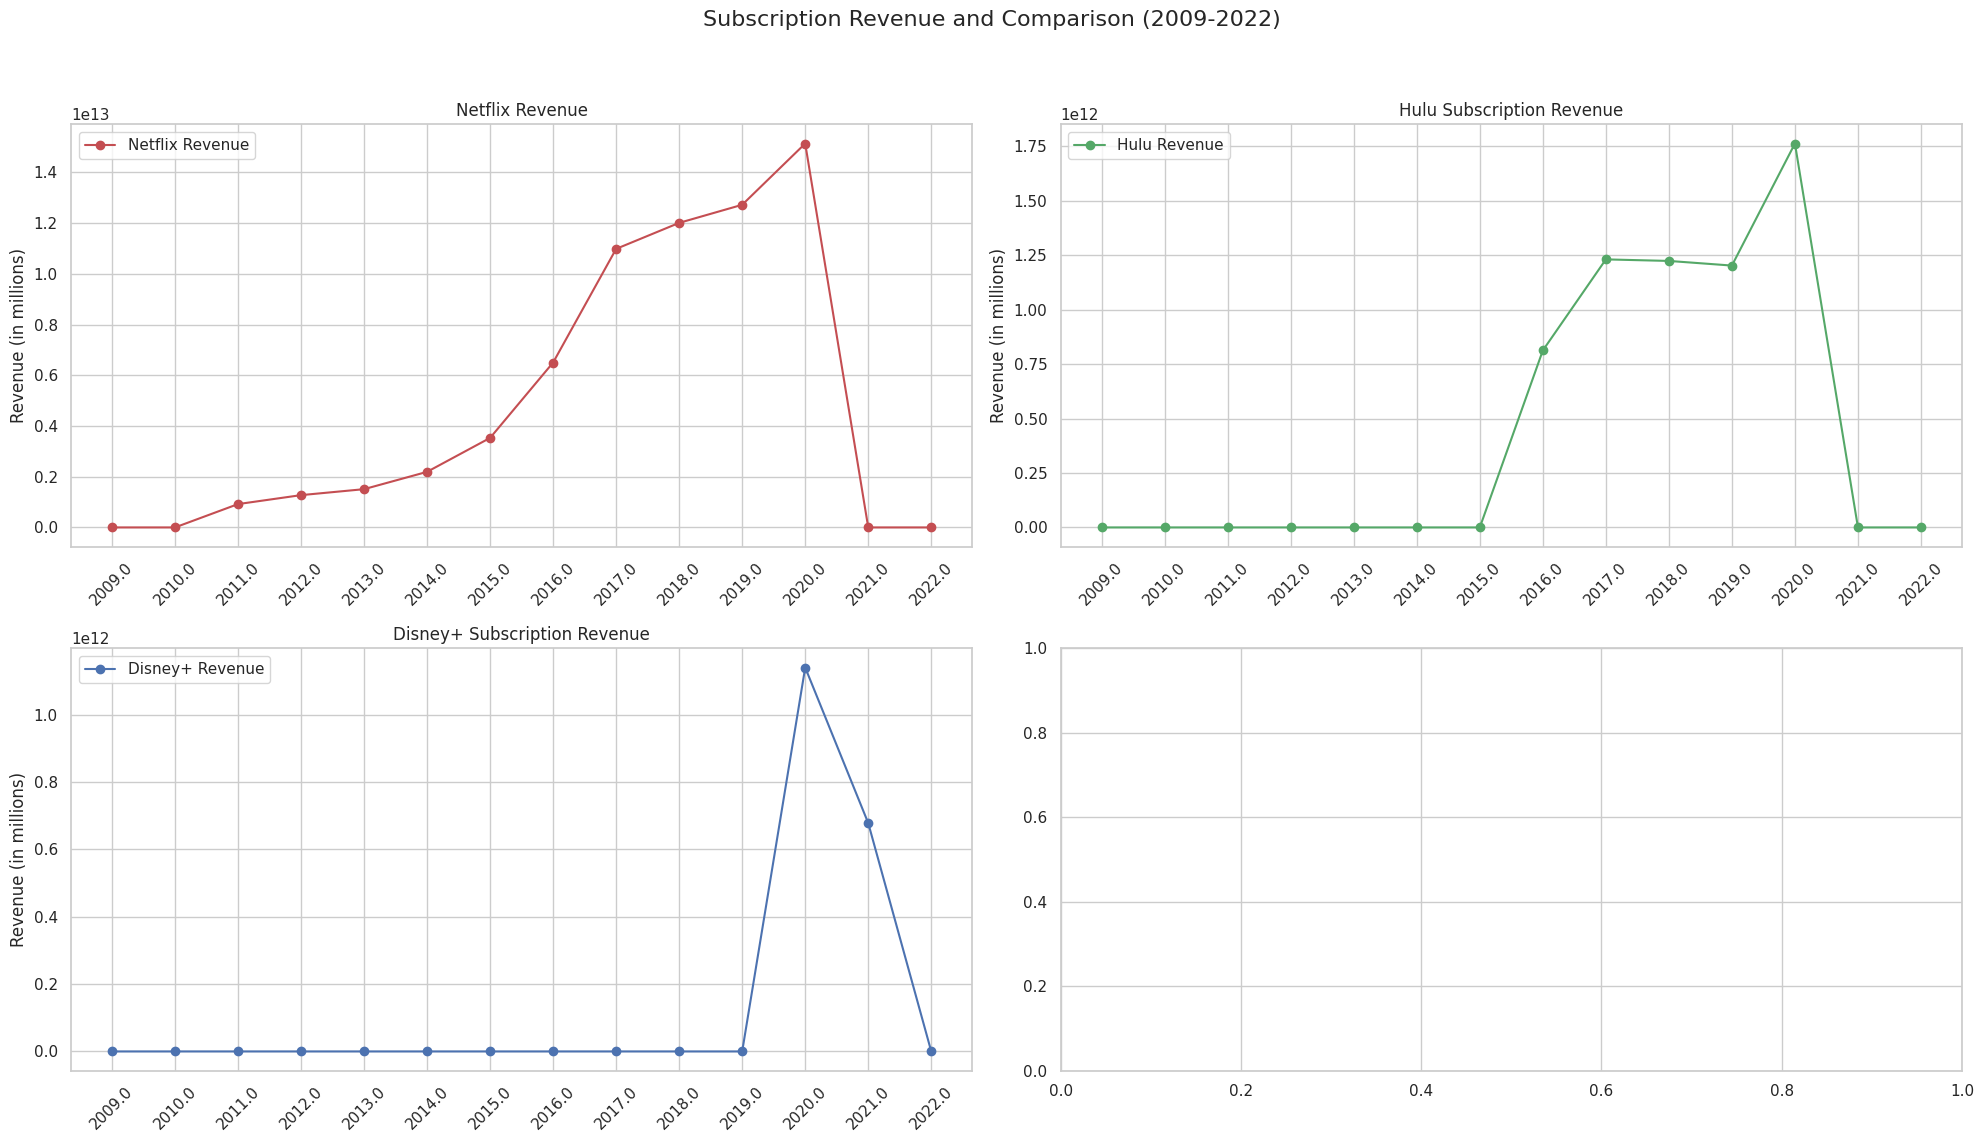

In [184]:
# Plotting the filtered data with individual subplots in a 2x2 grid and adding years for clarity
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Plot for Netflix Revenue
axs[0, 0].plot(filtered_data['Year'], filtered_data['Netflix Revenue'], label='Netflix Revenue', marker='o', color='r')
axs[0, 0].set_ylabel('Revenue (in millions)')
axs[0, 0].set_title('Netflix Revenue')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].set_xticks(filtered_data['Year'])
axs[0, 0].set_xticklabels(filtered_data['Year'], rotation=45)

# Plot for Hulu Subscription Revenue
axs[0, 1].plot(filtered_data['Year'], filtered_data['Hulu Subscription Revenue'], label='Hulu Revenue', marker='o', color='g')
axs[0, 1].set_ylabel('Revenue (in millions)')
axs[0, 1].set_title('Hulu Subscription Revenue')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].set_xticks(filtered_data['Year'])
axs[0, 1].set_xticklabels(filtered_data['Year'], rotation=45)

# Plot for Disney+ Subscription Revenue
axs[1, 0].plot(filtered_data['Year'], filtered_data['Disney Subscription Revenue'], label='Disney+ Revenue', marker='o', color='b')
axs[1, 0].set_ylabel('Revenue (in millions)')
axs[1, 0].set_title('Disney+ Subscription Revenue')
axs[1, 0].legend()
axs[1, 0].grid(True)
axs[1, 0].set_xticks(filtered_data['Year'])
axs[1, 0].set_xticklabels(filtered_data['Year'], rotation=45)

# Overall title
plt.suptitle('Subscription Revenue and Comparison (2009-2022)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Conclusion**
The analysis of subscription revenue for Netflix, Hulu, and Disney+ from 2009 to 2022 reveals significant growth across all platforms, with Netflix and Hulu peaking around 2019-2020 and Disney+ experiencing rapid expansion post-2019. These trends highlight the competitive and dynamic nature of the OTT streaming market, emphasizing the need for continuous adaptation to consumer preferences and market conditions to sustain growth.

In [278]:
# Create a DataFrame for plotting
movie_counts_df = pd.DataFrame(list(movie_counts.items()), columns=['Platform', 'Number of Movies'])


**Descriptive Question**:
"How do the average Rotten Tomatoes scores compare across streaming platforms (Disney+, Hulu, and Prime Video), and which platform consistently offers the highest-rated content?

In [189]:
# Preprocess the 'Rotten Tomatoes' column to convert 'XX/100' to numeric scores
# First, replace any non-numeric values with NaN
cleaner_data['Rotten Tomatoes'] = cleaner_data['Rotten Tomatoes'].str.replace('/100', '')
cleaner_data['Rotten Tomatoes'] = pd.to_numeric(cleaner_data['Rotten Tomatoes'], errors='coerce')

In [190]:
# Ensure 'Membership Start Date' and 'Membership End Date' are converted to datetime
cleaner_data['Membership Start Date'] = pd.to_datetime(cleaner_data['Membership Start Date'], errors='coerce')
cleaner_data['Membership End Date'] = pd.to_datetime(cleaner_data['Membership End Date'], errors='coerce')


In [191]:
# Calculate membership duration in days
cleaner_data['Membership Duration'] = (cleaner_data['Membership End Date'] - cleaner_data['Membership Start Date']).dt.days


In [192]:
# Define the platforms
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

In [193]:
# Melt the dataframe to have a single column for platform
melted_df = cleaner_data.melt(id_vars=['Title', 'Rotten Tomatoes'], value_vars=platforms,
                             var_name='Platform', value_name='Presence')

In [194]:
# Filter rows where the platform is present (i.e., Presence == 1)
melted_df = melted_df[melted_df['Presence'] == 1]

In [195]:
# Drop rows with NaN values in 'Rotten Tomatoes' column
melted_df = melted_df.dropna(subset=['Rotten Tomatoes'])

In [196]:
# Calculate average Rotten Tomatoes scores by platform
avg_scores_by_platform = melted_df.groupby('Platform')['Rotten Tomatoes'].mean().reset_index()

<ipython-input-197-a736c612af12>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_scores_by_platform, x='Platform', y='Rotten Tomatoes', palette='viridis')


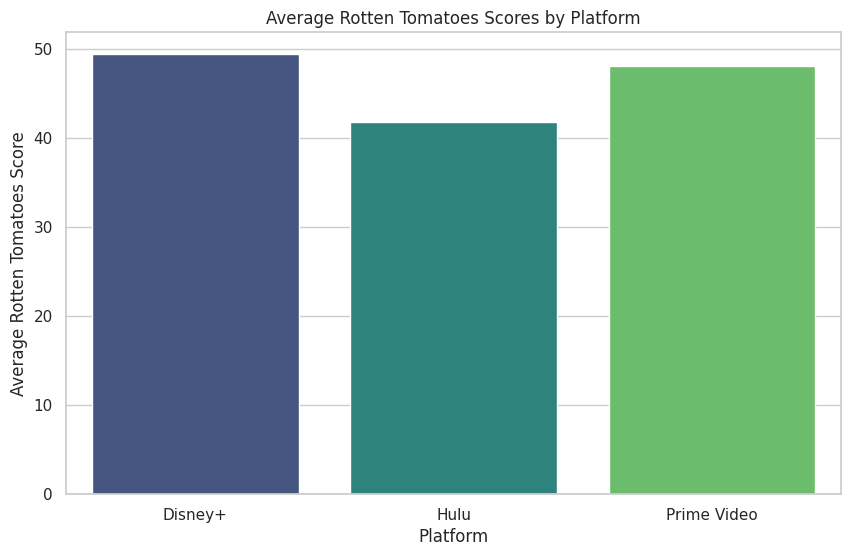

In [197]:
# Plot the average Rotten Tomatoes scores by platform
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_scores_by_platform, x='Platform', y='Rotten Tomatoes', palette='viridis')
plt.title('Average Rotten Tomatoes Scores by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Rotten Tomatoes Score')
plt.show()


<ipython-input-198-1c17d181e3ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_df, x='Platform', y='Rotten Tomatoes', palette='viridis')


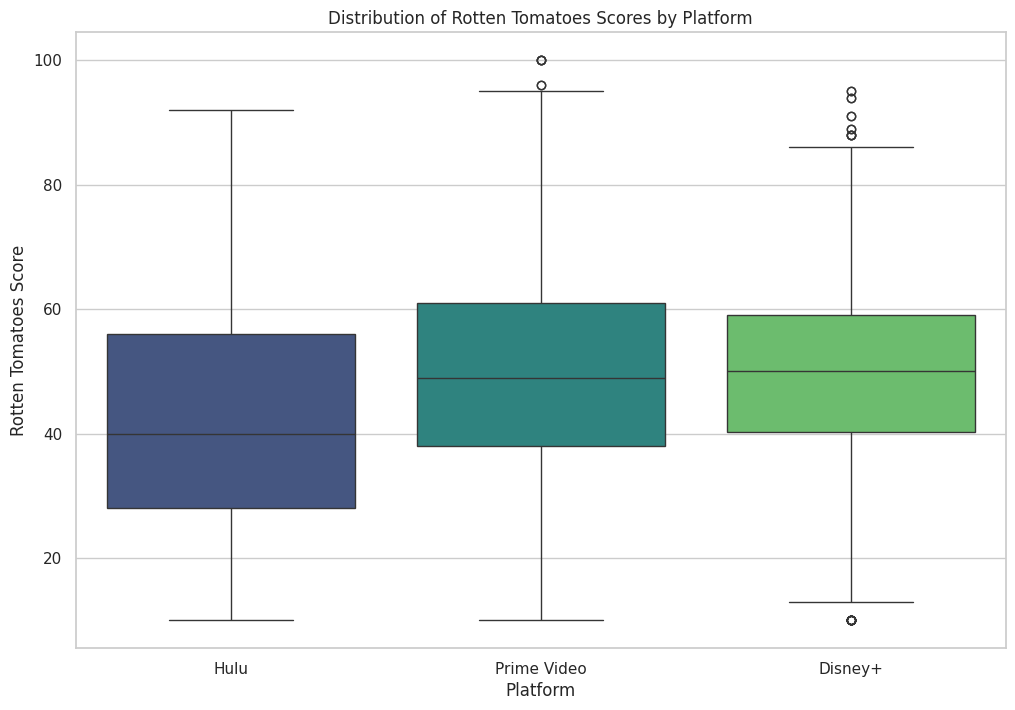

In [198]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_df, x='Platform', y='Rotten Tomatoes', palette='viridis')
plt.title('Distribution of Rotten Tomatoes Scores by Platform')
plt.xlabel('Platform')
plt.ylabel('Rotten Tomatoes Score')

# Show the plot
plt.show()



The box plot displays Rotten Tomatoes scores for each platform. It provides insights into the range, median, and differencea in content ratings on each platform.
Wider boxes or longer whiskers indicate a larger range of content quality, while narrower boxes suggest more consistent quality.
Outliers show very low rated content

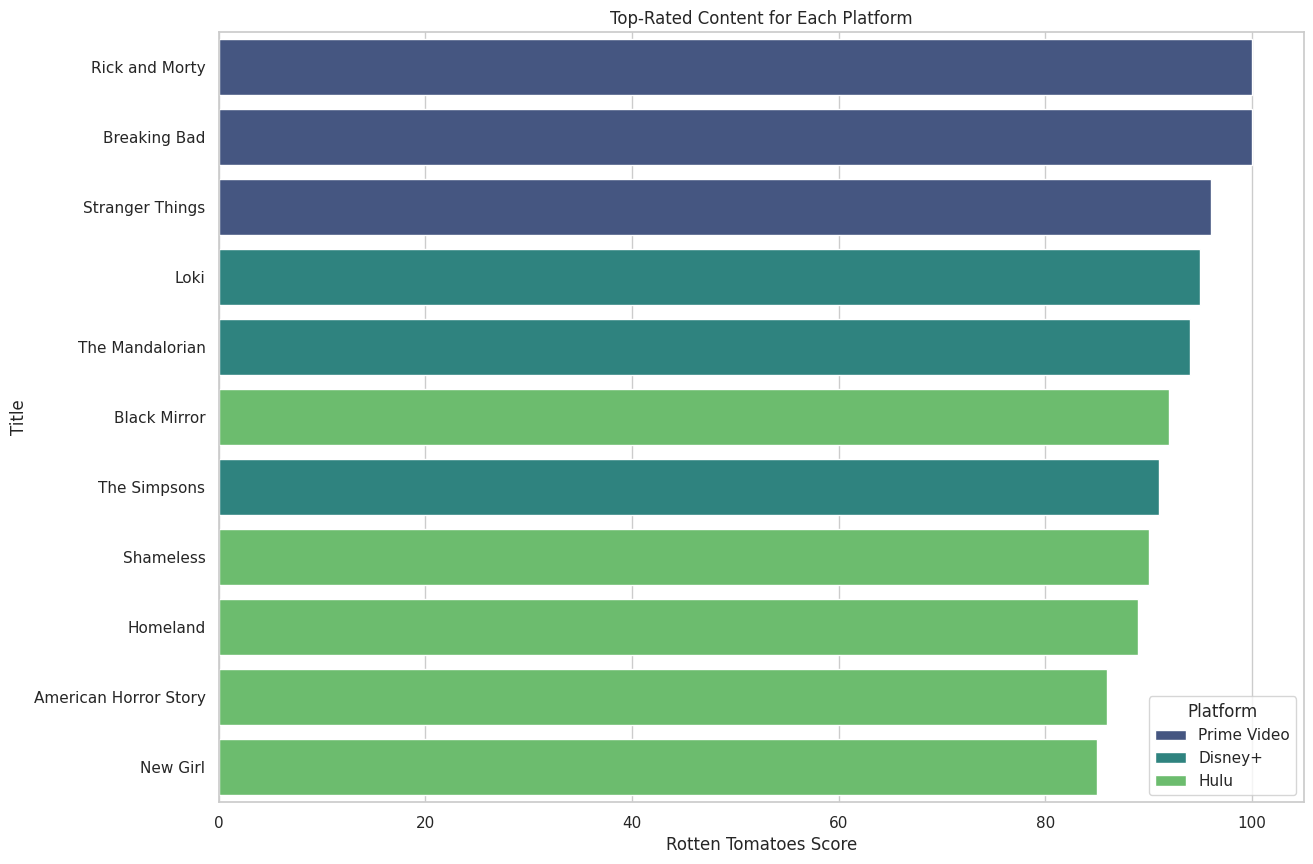

In [199]:
# Identify and plot the top-rated content for each platform
top_rated_content_by_platform = melted_df.sort_values(by='Rotten Tomatoes', ascending=False).groupby('Platform').head(5)

plt.figure(figsize=(14, 10))
sns.barplot(data=top_rated_content_by_platform, x='Rotten Tomatoes', y='Title', hue='Platform', dodge=False, palette='viridis')
plt.title('Top-Rated Content for Each Platform')
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Title')
plt.legend(title='Platform')
plt.show()


Descriptive Question:
"What is the relationship between Rotten Tomatoes scores and subscription revenues for major streaming platforms (Hulu, Disney+, Netflix, and Prime Video), and how do these correlations reflect the impact of content quality on financial performance?

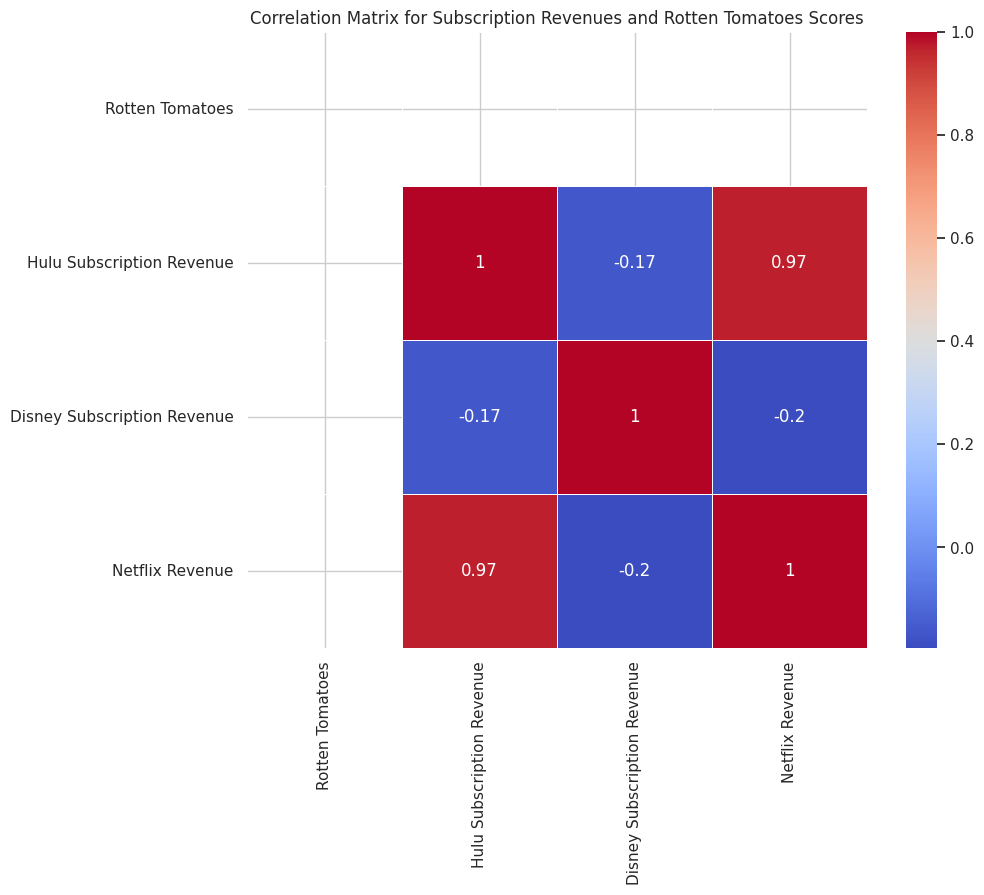

In [230]:
# Identify Available Columns
relevant_columns = ['Rotten Tomatoes', 'Hulu Subscription Revenue', 'Disney Subscription Revenue', 'Netflix Revenue', 'Prime Video Subscription ARPU']
available_columns = [col for col in relevant_columns if col in cleaner_data.columns]

# Replace 'Unknown' values with NaN
for col in available_columns:
    cleaner_data[col] = cleaner_data[col].replace('Unknown', np.nan)

# Convert columns to numeric types
for col in available_columns:
    cleaner_data[col] = pd.to_numeric(cleaner_data[col], errors='coerce')

# Handle missing values by filling them with the mean of each column
filtered_data = cleaner_data[available_columns].copy()
filtered_data.fillna(filtered_data.mean(), inplace=True)

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Subscription Revenues and Rotten Tomatoes Scores')
plt.show()

**Conclusion:**
The correlation matrix reveals a strong positive relationship between Hulu and Netflix revenues, suggesting that users often subscribe to both. In contrast, Disney+ shows a weak negative correlation with both Hulu and Netflix, indicating slight competition. The dataset lacks sufficient data on Rotten Tomatoes scores to assess their impact on revenues.




So that didnt really tell us much but it did tell us that good content does not reflect more subscribers. How about content in general

**Descriptive Question:**
How does the total subscription revenue compare to the total number of movies available on Hulu and Disney+, and what insights can be drawn about their content strategies from this comparison?

In [283]:
# Searching the entire dataset for any non-zero "Hulu Subscription Revenue" values
non_zero_hulu_revenue_full = cleaner_data[cleaner_data['Hulu Subscription Revenue'] != 0]

# Aggregating total Hulu subscription revenue from non-zero values
total_hulu_revenue = non_zero_hulu_revenue_full['Hulu Subscription Revenue'].sum()

# Calculate the total Hulu subscription revenue in billions for clarity
total_hulu_revenue_in_billions = total_hulu_revenue / 1e9
total_hulu_revenue_in_billions


6233.9

<ipython-input-285-e55ae20dd155>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=hulu_plot_data, palette=['green', 'red'], ax=ax1)


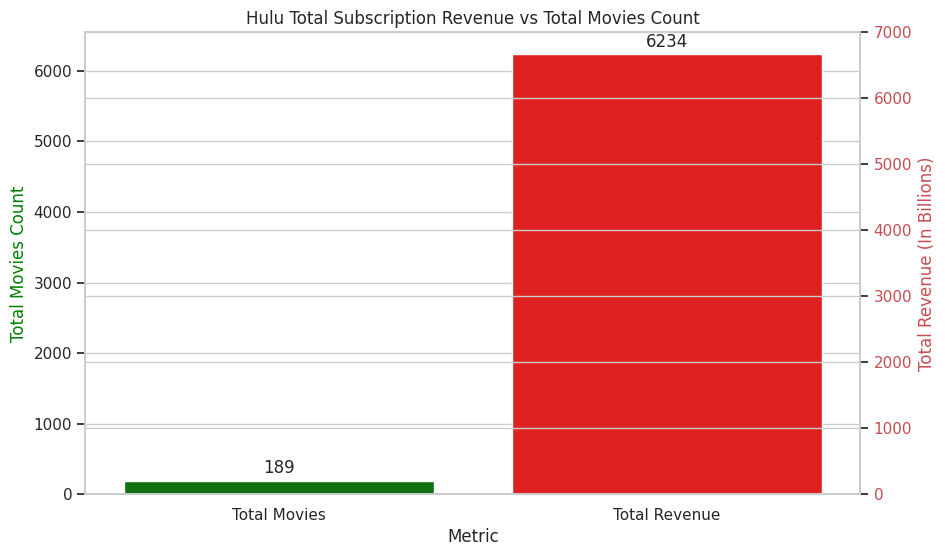

In [285]:
# Create a bar plot with Seaborn for Hulu with value annotations and clear separation
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the Hulu data
sns.barplot(x='Metric', y='Value', data=hulu_plot_data, palette=['green', 'red'], ax=ax1)

# Adding labels and title
ax1.set_ylabel('Total Movies Count', color='green')
ax1.set_title('Hulu Total Subscription Revenue vs Total Movies Count')

# Annotating the bars with their values
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9),
                 textcoords = 'offset points')

# Adjusting y-axis for total revenue
ax2 = ax1.twinx()
ax2.set_ylim(0, total_hulu_revenue_in_billions * 1.1)  # Extend the limit slightly for better visualization
ax2.set_ylabel('Total Revenue (In Billions)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the y-ticks for the movie count axis
ax1.set_yticks

# Set the y-ticks for the revenue axis in billions
ax2.set_yticks(range(0, int(total_hulu_revenue_in_billions) + 1000, 1000))

# Display the plot
plt.show()







Hulu Subscription Revenue: $6.233 billion

<ipython-input-281-224a57da8b6a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=plot_data, palette=['blue', 'red'], ax=ax)


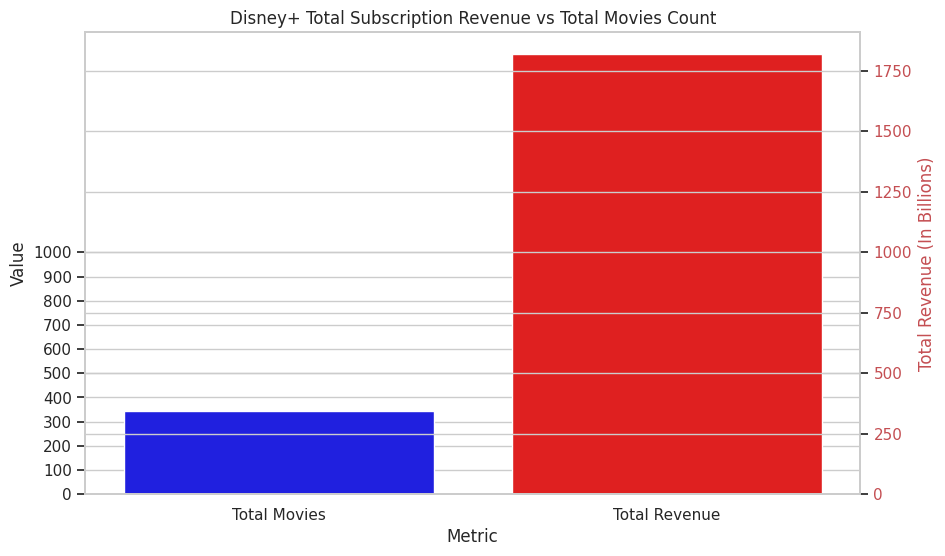

In [281]:
# Convert total revenue to billions for better readability
total_revenue_in_billions = total_revenue / 1e9
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Metric': ['Total Movies', 'Total Revenue'],
    'Value': [total_movies_count, total_revenue_in_billions]
})

# Create a bar plot with seaborn
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data
sns.barplot(x='Metric', y='Value', data=plot_data, palette=['blue', 'red'], ax=ax)

# Adding labels and title
ax.set_ylabel('Value')
ax.set_title('Disney+ Total Subscription Revenue vs Total Movies Count')
ax.set_yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
ax.set_yticklabels(['0', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000'])

# Adjusting y-axis for total revenue
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_ylabel('Total Revenue (In Billions)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Display the plot
plt.show()

Disney Subscription Revenue: $1.819 billion

**Conclusion:**
Hulu and Disney+ have different approaches: Hulu generates high revenue with fewer movies, potentially focusing on TV shows or higher subscription rates, while Disney+ leverages its extensive movie library to drive its revenue. This highlights the diverse strategies streaming platforms can employ to achieve financial success.

Descriptive Question: "How does the number of movies available on each streaming platform (Netflix, Hulu, Disney+, and Prime Video) compare, and which platform offers the largest content library?

<ipython-input-318-045896d8d16a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Total Movies', data=platform_counts_df, palette='viridis')


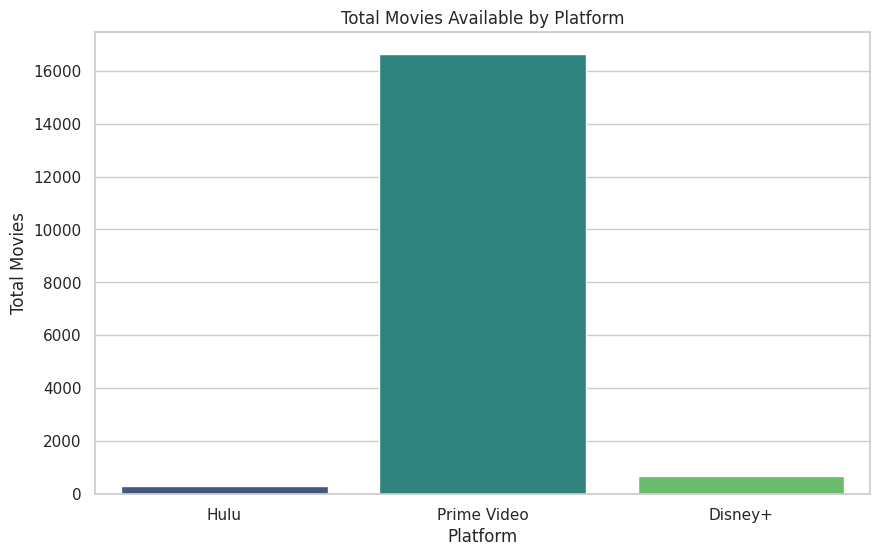

In [318]:
# Calculate the number of unique titles for each platform using the specific movie columns
platform_counts = {
    'Hulu': cleaner_data['Hulu Movies'].notna().sum(),
    'Prime Video': cleaner_data['Prime Video Movies'].notna().sum(),
    'Disney+': cleaner_data['Disney+ Movies'].notna().sum()
}

# Convert the dictionary to a DataFrame for plotting
platform_counts_df = pd.DataFrame(list(platform_counts.items()), columns=['Platform', 'Total Movies'])

# Create a bar plot to visualize the number of movies available on each platform
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Total Movies', data=platform_counts_df, palette='viridis')
plt.title('Total Movies Available by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Movies')
plt.show()

**Conclusion:**The bar plot shows that Prime Video has the largest movie library among the platforms, significantly surpassing Hulu and Disney+. Hulu has the smallest number of movies, while Disney+ offers more than Hulu but far fewer than Prime Video. Prime Video clearly leads in movie availability, with Hulu and Disney+ offering smaller selections.

**Whats Next?**

Questions:
How do the user interfaces and user experiences compare across platforms?

What exclusive content or original programming is available on each platform?

What are the demographics and preferences of the user base for each platform?

How do the content recommendation algorithms differ among the platforms, and
how effective are they?


Recommendations:
Look into why the correlation between hulu subscription revenue and netflix subsciption revenue is so strong

Gather more Data to perform a better analysis, a more complete dataset would give us a better idea of trend

Content expansion for companies with smaller libraries

Inferential questions:

Does the diversity of content affect user retention rates across different platforms?

How does the average Rotten Tomatoes score of a platform's movie library impact user engagement and satisfaction?

What role does pricing strategy play in the perceived value of a platform's content library?

